# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [5]:
cd CV-HW/lesson_2/

/content/CV-HW/lesson_2


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

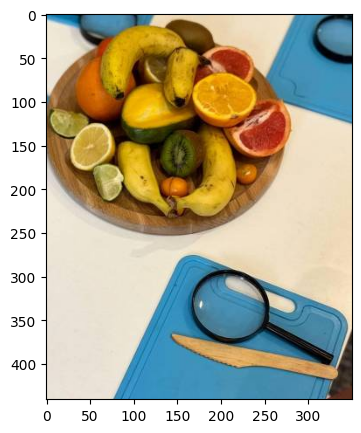

In [9]:
img = cv2.imread('./data/photo_3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x7acb6856e170>)

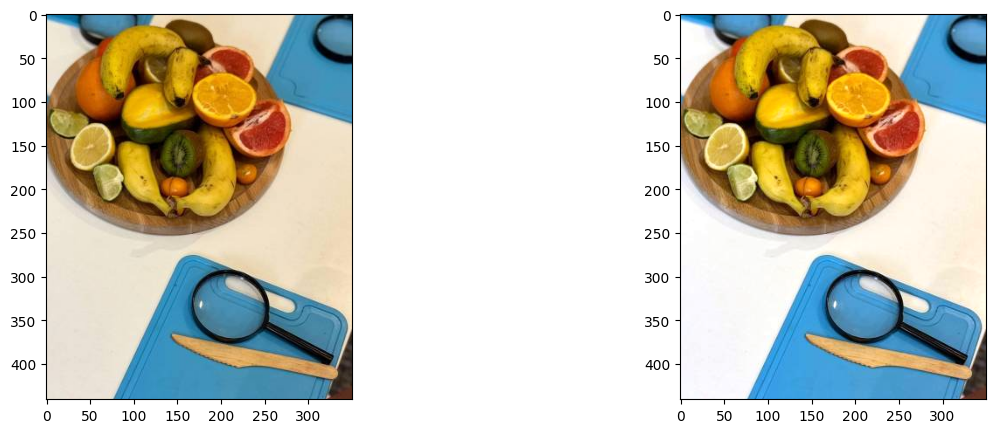

In [19]:
# Define white patch and the coefficients
row, col = 250, 30
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

162.642947845805 156.6426433430515 128.4444055717525
162.642947845805
1.0 0.96 0.79


(<Axes: >, <matplotlib.image.AxesImage at 0x7acb59e3c430>)

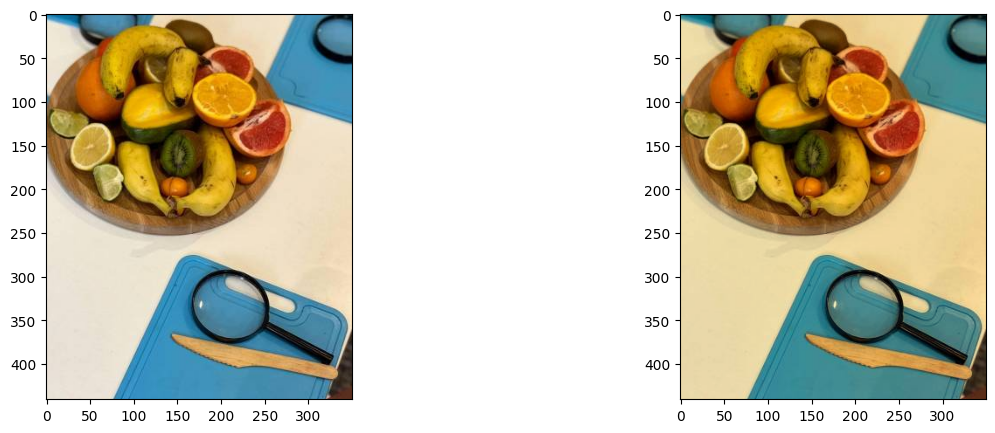

In [65]:
# Load your image
img = cv2.imread('./data/photo_3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = img[..., 0].mean()
mean_g = img[..., 1].mean()
mean_b = img[..., 2].mean()
print(mean_r, mean_g, mean_b)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

# the brightest colour channel has max mean value
mean_max = np.array([mean_r, mean_g, mean_b]).max()
print(mean_max)

# the coefficient of the brightest colour channel will be 1
kr = round (mean_r / mean_max, 2)
kg = round (mean_g / mean_max, 2)
kb = round (mean_b / mean_max, 2)
print(kr, kg, kb)

# Apply color balancing and generate the balanced image
balanced = img.copy()
balanced[..., 0] = img[..., 0] * kr
balanced[..., 1] = img[..., 1] * kg
balanced[..., 2] = img[..., 2] * kb

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

177 133 79


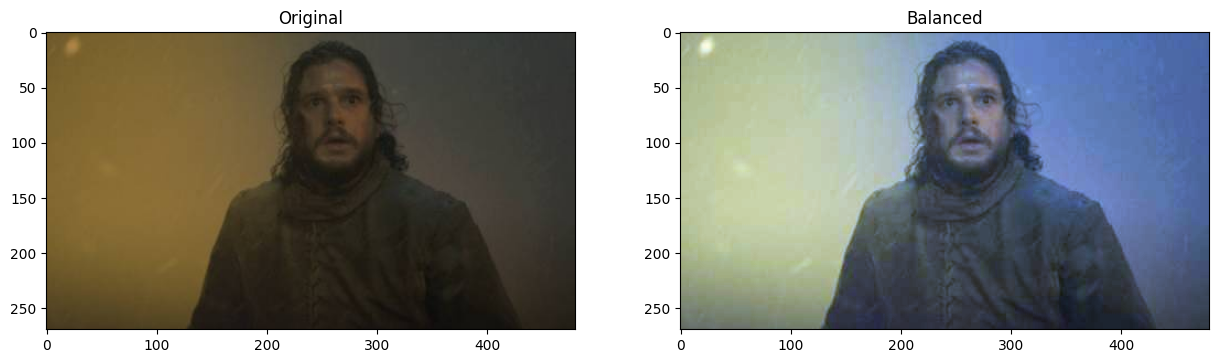

In [67]:
# Scale-by-max algorithm
# Load your image
img = cv2.imread('./data/photo_4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = img[..., 0].max()
max_g = img[..., 1].max()
max_b = img[..., 2].max()
print(max_r, max_g, max_b)

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[..., 0] = img[..., 0] / max_r
balanced[..., 1] = img[..., 1] / max_g
balanced[..., 2] = img[..., 2] / max_b

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Balanced')
plt.show()

In [70]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   data/photo_3.jpg
	new file:   data/photo_4.jpg

